In [2]:
%matplotlib inline

# standard
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# I've got style,
# miles and miles
import seaborn as sns
sns.set()
sns.set_context('notebook', font_scale=1.5)
cp = sns.color_palette()

In [5]:
ts = pd.read_csv('https://github.com/leoluyi/code_snippets/raw/master/python-viz/py-viz/data/ts.csv')
ts.head()

,dt,kind,value
0,2000-01-01,A,1.442521
1,2000-01-02,A,1.981290
2,2000-01-03,A,1.586494
3,2000-01-04,A,1.378969
4,2000-01-05,A,-0.277937


In [65]:
ts['dt'] = pd.to_datetime(ts.dt)

In [66]:
dfp = ts.set_index(['dt', 'kind']).unstack()
dfp.head()

value                              
kind               A         B         C         D
dt                                                
2000-01-01  1.442521  1.808741  0.437415  0.096980
2000-01-02  1.981290  2.277020  0.706127 -1.523108
2000-01-03  1.586494  3.474392  1.358063 -3.100735
2000-01-04  1.378969  2.906132  0.262223 -2.660599
2000-01-05 -0.277937  3.489553  0.796743 -3.417402

In [67]:
dfp.columns.

SyntaxError: invalid syntax (<ipython-input-67-cff0554cc5cb>, line 1)

In [68]:
dfp = dfp.droplevel(0, axis=1)
dfp.head()

kind,A,B,C,D
dt,,,,
2000-01-01,1.442521,1.808741,0.437415,0.096980
2000-01-02,1.981290,2.277020,0.706127,-1.523108
2000-01-03,1.586494,3.474392,1.358063,-3.100735
2000-01-04,1.378969,2.906132,0.262223,-2.660599
2000-01-05,-0.277937,3.489553,0.796743,-3.417402


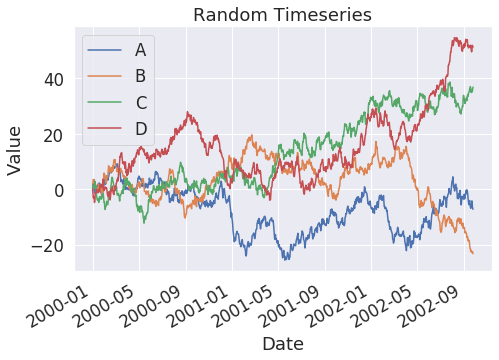

In [72]:
fig, ax = plt.subplots(1, 1,
                       figsize=(7.5, 5))

for k in ts.kind.unique():
    tmp = ts.loc[ts.kind == k, :]
    ax.plot(tmp.dt, tmp.value, label=k)

ax.set(xlabel='Date',
       ylabel='Value',
       title='Random Timeseries')    
    
ax.legend(loc=2)
fig.autofmt_xdate()
plt.show()

No handles with labels found to put in legend.


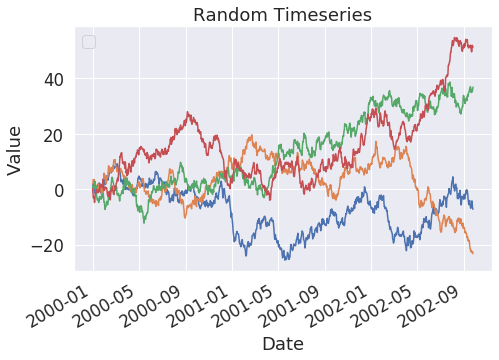

In [75]:
fig, ax = plt.subplots(1, 1,
                       figsize=(7.5, 5))

ax.plot(dfp)

ax.set(xlabel='Date',
       ylabel='Value',
       title='Random Timeseries')

ax.legend(loc=2)
fig.autofmt_xdate()